In [1]:
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
# %matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import sys
import pyicon as pyic
import cartopy
import cartopy.crs as ccrs 

## Specify data set

In [3]:
# run = 'nib0002'
# runname = 'icon_08'
# gname = 'r2b6'
# lev = 'L64'
# t1 = '2050-02-01'
# t2 = '2060-01-01'

# run = 'nib0001'
# runname = 'icon_test_reconstructions'
run = 'nib0001'
runname = 'icon_14'
gname = 'r2b4'
lev = 'L40'
t1 = '2001-01-01T06:00:00.000'
t2 = t1

path_data     = f'/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/{runname}/icon-oes/experiments/{run}/'
path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree  = f'{path_grid}ckdtree/'
fpath_ckdtree = f'{path_grid}ckdtree/rectgrids/{gname}_res0.30_180W-180E_90S-90N.npz'
fpath_fx      = f'{path_grid}{gname}_{lev}_fx.nc'
fname_moc = run+'_MOC_????????????????.nc'

In [4]:
IcD = pyic.IconData(
               fname        = run+'_????????????????.nc',
               path_data    = path_data,
               path_grid    = path_grid,
               gname        = gname,
               lev          = lev,
               do_triangulation    = True,
               calc_coeff_mappings = True,
               omit_last_file      = False,
              )

Start with calc_coeff...
Done with calc_coeff!
Start with calc_coeff_mappings...
--- fixed_vol_norm
--- edge2edge_viacell_coeff
--- edge2cell_coeff_cc
--- edge2cell_coeff_cc_t
Done with calc_coeff_mappings!


In [5]:
print('moc')
IcD_moc = pyic.IconData(
               fname        = fname_moc,
               path_data    = path_data,
               path_grid    = path_grid,
               gname        = gname,
               lev          = lev,
               do_triangulation   = False,
               omit_last_file     = False,
               load_vertical_grid = False,
               load_triangular_grid = False,
               calc_coeff         = False,

              )

moc


## Load data

In [6]:
iz = np.argmin(np.abs(IcD.depthc-1000.))
ie30w26n = np.argmin((IcD.elon+30.)**2+(IcD.elat-26.)**2)
ic30w26n = np.argmin((IcD.clon+30.)**2+(IcD.clat-26.)**2)

# --- load data
# f = Dataset(IcD.flist_ts[it], 'r')
# mass_flux = f.variables['mass_flux'][IcD.its[it],:,:]
# mass_flux_vint = mass_flux.sum(axis=0)
# f.close()
mass_flux, it_ave   = pyic.time_average(IcD, 'mass_flux', t1=t1, t2=t2, iz='all')
mass_flux_vint = mass_flux.sum(axis=0)
uo, it_ave   = pyic.time_average(IcD, 'u', t1=t1, t2=t2, iz='all')
vo, it_ave   = pyic.time_average(IcD, 'v', t1=t1, t2=t2, iz='all')
wo, it_ave   = pyic.time_average(IcD, 'w', t1=t1, t2=t2, iz='all')
vn, it_ave   = pyic.time_average(IcD, 'normal_velocity', t1=t1, t2=t2, iz='all')
vn_tw, it_ave   = pyic.time_average(IcD, 'vn_time_weighted', t1=t1, t2=t2, iz='all')
zo, it_ave   = pyic.time_average(IcD, 'zos', t1=t1, t2=t2, iz='all')
to, it_ave   = pyic.time_average(IcD, 'to', t1=t1, t2=t2, iz='all')
so, it_ave   = pyic.time_average(IcD, 'so', t1=t1, t2=t2, iz='all')
HeatFlux_Total, it_ave = pyic.time_average(IcD, 'HeatFlux_Total', t1=t1, t2=t2, iz='all')
FrshFlux_TotalOcean, it_ave = pyic.time_average(IcD, 'FrshFlux_TotalOcean', t1=t1, t2=t2, iz='all')
delta_thetao, it_ave   = pyic.time_average(IcD, 'delta_thetao', t1=t1, t2=t2, iz='all')

# to, it_ave   = pyic.time_average(IcD, 'to', t1=t1, t2=t2, iz='all')
# so, it_ave   = pyic.time_average(IcD, 'so', t1=t1, t2=t2, iz='all')

pyicon.time_average: var=mass_flux: it_ave=[6]
pyicon.time_average: var=u: it_ave=[6]
pyicon.time_average: var=v: it_ave=[6]
pyicon.time_average: var=w: it_ave=[6]
pyicon.time_average: var=normal_velocity: it_ave=[6]
pyicon.time_average: var=vn_time_weighted: it_ave=[6]
pyicon.time_average: var=zos: it_ave=[6]
pyicon.time_average: var=to: it_ave=[6]
pyicon.time_average: var=so: it_ave=[6]
pyicon.time_average: var=HeatFlux_Total: it_ave=[6]
pyicon.time_average: var=FrshFlux_TotalOcean: it_ave=[6]
pyicon.time_average: var=delta_thetao: it_ave=[6]


In [7]:
dz = 1.*IcD.dzw
dz[0,:] += zo

dze = 1.*IcD.prism_thick_e
dze[0,:] += 0.5*(zo[IcD.adjacent_cell_of_edge[:,0]]+zo[IcD.adjacent_cell_of_edge[:,1]])

## Edges to 2D cell local (edges2cell, calc_2dlocal_from_3d)

In [8]:
# p_vn_c = pyic.edges2cell(IcD, vn)
p_vn_tw = pyic.edges2cell(IcD, vn_tw)
p_vn = pyic.edges2cell(IcD, vn)
# p_vn = pyic.edges2cell(IcD, mass_flux/IcD.dze)
uo_p_vn, vo_p_vn = pyic.calc_2dlocal_from_3d(IcD, p_vn)

In [9]:
ic30w26n = np.argmin((IcD.clon+30.)**2+(IcD.clat-26.)**2)
ic = ic30w26n
ni = 16
block = (ic+1)//ni + 1 
index = (ic+1)-(block-1)*ni 
block, index, ic

(413, 3, 6594)

In [10]:
from pyicon import scalar_product
ve = vn

# dim(dist_vector) = (nCells, nEdgesOfCell, nCartDims)
dist_vector = IcD.edge_cart_vec[IcD.edge_of_cell,:] - IcD.cell_cart_vec[:,np.newaxis,:]
# dim(edge2cell_coeff_cc) = (nCells, nEdgesOfCell, nCartDims)
edge2cell_coeff_cc = dist_vector * IcD.edge_length[IcD.edge_of_cell,np.newaxis] * IcD.orientation_of_normal[:,:,np.newaxis]
# dim(edge2cell_coeff_cc[np.newaxis,:,:,:]) = (nDepth, nCells, nEdgesOfCell, nCartDims)
p_vn_c = (edge2cell_coeff_cc[np.newaxis,:,:,:]*ve[:,IcD.edge_of_cell,np.newaxis]*IcD.prism_thick_e[:,IcD.edge_of_cell,np.newaxis]).sum(axis=2)
# dim(fixed_vol_norm) = (nCells)
fixed_vol_norm = (0.5 * np.sqrt(scalar_product(dist_vector,dist_vector,dim=2)) * IcD.edge_length[IcD.edge_of_cell]).sum(axis=1)
p_vn_c *= 1./(fixed_vol_norm[np.newaxis,:,np.newaxis]*IcD.prism_thick_c[:,:,np.newaxis])

uo_p_vn, vo_p_vn = pyic.calc_2dlocal_from_3d(IcD, p_vn)

In [11]:
iz = 0
print('clon = ', IcD.clon[ic]*np.pi/180., 'clat = ', IcD.clat[ic]*np.pi/180.)
print('dist_vector = ', dist_vector[ic,0,:])
print('edge2cell_coeff_cc = ', IcD.edge2cell_coeff_cc[ic,0,:])
print('p_vn_c = ', p_vn_c[iz,ic,:])
print('vn = ', vn[:,IcD.edge_of_cell][iz,ic,0])

clon =  -0.5254897011608033 clat =  0.4693127377801018
dist_vector =  [ 0.00661431  0.00670908 -0.00477004]
edge2cell_coeff_cc =  [-0.00025736489092906587 -0.00026105249635819885 0.00018560348984720073]
p_vn_c =  [-0.03319326435248473 -0.03610906679359695 0.020803049784054593]
vn =  0.050416213


In [12]:
iz = 0
print('clon = ', IcD.clon[ic]*np.pi/180., 'clat = ', IcD.clat[ic]*np.pi/180.)
print('dist_vector = ', dist_vector[ic,0,:])
print('edge2cell_coeff_cc = ', IcD.edge2cell_coeff_cc[ic,0,:])
print('p_vn_c = ', p_vn_c[iz,ic,:])
print('vn = ', vn[:,IcD.edge_of_cell][iz,ic,0])

clon =  -0.5254897011608033 clat =  0.4693127377801018
dist_vector =  [ 0.00661431  0.00670908 -0.00477004]
edge2cell_coeff_cc =  [-0.00025736489092906587 -0.00026105249635819885 0.00018560348984720073]
p_vn_c =  [-0.03319326435248473 -0.03610906679359695 0.020803049784054593]
vn =  0.050416213


In [13]:
iz = 0
lon, lat, uoi = pyic.interp_to_rectgrid(uo[iz,:], fpath_ckdtree=fpath_ckdtree)
lon, lat, voi = pyic.interp_to_rectgrid(vo[iz,:], fpath_ckdtree=fpath_ckdtree)
lon, lat, uo_vei = pyic.interp_to_rectgrid(uo_p_vn[iz,:], fpath_ckdtree=fpath_ckdtree)
lon, lat, vo_vei = pyic.interp_to_rectgrid(vo_p_vn[iz,:], fpath_ckdtree=fpath_ckdtree)

<IPython.core.display.Javascript object>


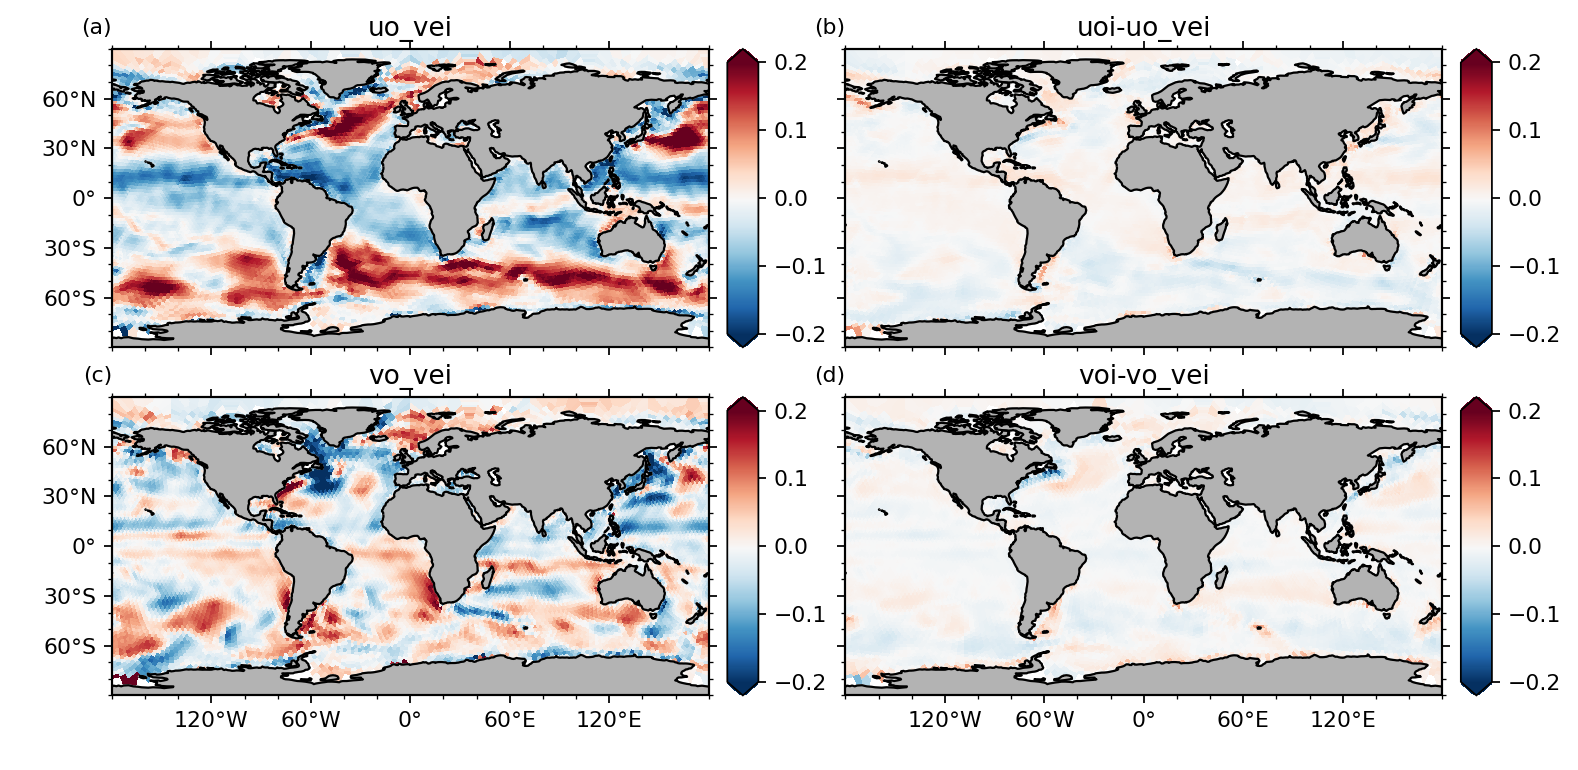

Text(0.5, 1.0, 'voi-vo_vei')

In [14]:
# --- projection
ccrs_proj = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(2,2, asp=0.5, projection=ccrs_proj, fig_size_fac=1.2,
                             sharex=True, sharey=True)
ii=-1

clim = 0.2
clim_diff = clim

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, uo_vei, ax=ax, cax=cax, clim=clim, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global')
ax.set_title('uo_vei')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, uoi-uo_vei, ax=ax, cax=cax, clim=clim_diff, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global')
ax.set_title('uoi-uo_vei')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, vo_vei, ax=ax, cax=cax, clim=clim, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global')
ax.set_title('vo_vei')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, voi-vo_vei, ax=ax, cax=cax, clim=clim_diff, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global')
ax.set_title('voi-vo_vei')

## 3D cell to 2D local (calc_2dlocal_from_3d)

This happens in math/mo_scalar_product.f90: calc_scalar_product_veloc_3d

In [15]:
uo3, vo3 = pyic.calc_2dlocal_from_3d(IcD, p_vn)

## 3D cell to edges (calc_3d_from_2dlocal, edges2cell, cell2edges)

In [16]:
dz = 1.*IcD.dzw
dz[0,:] += zo
# IcD.dzw[0,:] += zo

In [17]:
dz[0,:10]

masked_array(data=[11.992071 , 12.012767 , 11.9811735,  0.       ,
                   12.037168 , 12.036183 ,  0.       , 12.020882 ,
                    0.       , 11.990872 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [18]:
uo_vint = (uo*dz).sum(axis=0)
vo_vint = (vo*dz).sum(axis=0)
uo_dz = (uo*dz)
vo_dz = (vo*dz)
vn_tw_dz = (vn_tw*IcD.dze)

In [19]:
# calculate 3d p-array
p_vo_vint_3d = pyic.calc_3d_from_2dlocal(IcD, uo_vint[np.newaxis,:], vo_vint[np.newaxis,:])
p_vo_3d = pyic.calc_3d_from_2dlocal(IcD, uo, vo)
p_vn_3d = pyic.edges2cell(IcD, vn_tw_dz)
# calculate edge array
ptp_vo_vint_e = pyic.cell2edges(IcD, p_vo_vint_3d*IcD.wet_c[0:1,:,np.newaxis])*IcD.wet_e[0,:]
ptp_vo_e = pyic.cell2edges(IcD, p_vo_3d*IcD.wet_c[:,:,np.newaxis])*IcD.wet_e * IcD.dze
ptp_vn_e = pyic.cell2edges(IcD, p_vn_3d*IcD.wet_c[:,:,np.newaxis])*IcD.wet_e

In [20]:
out_vn_e = pyic.edges2edges_via_cell(IcD, vn_tw)

In [21]:
# from pyicon import scalar_product

#vn_e = vn_tw

# cell_index = IcD.adjacent_cell_of_edge

# # dist_vector_basic: distance vector between edge center and center of the two neighbouring cells
# # dim(dist_vector_basic) = (nEdges, nCellOfEdges, nCartDims)
# dist_vector_basic = IcD.edge_cart_vec[:,np.newaxis,:] - IcD.cell_cart_vec[cell_index,:]
# dist_edge_cell_basic  = np.sqrt(scalar_product(dist_vector_basic,dist_vector_basic, dim=2))
# dist_vector_basic *= 1./dist_edge_cell_basic[:,:,np.newaxis]
# orientation = scalar_product(dist_vector_basic, IcD.edge_prim_norm[:,np.newaxis,:], dim=2)
# dist_vector_basic *= np.sign(orientation)[:,:,np.newaxis]

# cell_center = IcD.cell_cart_vec[cell_index,:]
# edge_center = IcD.edge_cart_vec

# # dist_vector: distance vector between adjacent cell centers of edge and their sourounding edges
# # dim(edge_index_cell) = (nEdges, neighbCells, neighbEdges)
# edge_index_cell = IcD.edge_of_cell[cell_index,:]
# # dim(dist_vector) = (nEdges, nCellOfEdges, nEdgesOfCell, nCartDims)
# dist_vector = IcD.edge_cart_vec[edge_index_cell,:] - cell_center[:,:,np.newaxis,:]
# dist_edge_cell = np.sqrt(scalar_product(dist_vector, dist_vector, dim=3))
# dist_vector *= 1./ dist_edge_cell[:,:,:,np.newaxis]
# dist_vector *= IcD.orientation_of_normal[cell_index][:,:,:,np.newaxis]

# edge2edge_viacell_coeff_2D = scalar_product(dist_vector_basic[:,:,np.newaxis,:],dist_vector, dim=3)

# # math/mo_operator_ocean_coeff_3d.f90: init_operator_coeffs_cell
# edge2edge_viacell_coeff_2D *= (  (IcD.edge_length[edge_index_cell]/IcD.grid_sphere_radius)
#                                * dist_edge_cell*dist_edge_cell_basic[:,:,np.newaxis] 
#                                / (IcD.dual_edge_length[:,np.newaxis,np.newaxis]/IcD.grid_sphere_radius)
#                               )

# ni = 16
# ie30w26n = np.argmin((IcD.elon+30.)**2+(IcD.elat-26.)**2)
# ip = ie30w26n
# block = (ip+1)//ni + 1 
# index = (ip+1)-(block-1)*ni 
# block, index

# neigbor = 0
# ictr = 0
# print('elon = ', IcD.elon[ip]*np.pi/180., 'elat = ', IcD.elat[ip]*np.pi/180.)
# print('dist_edge_cell = ', dist_edge_cell[ip, neigbor, ictr])
# print('dist_vector = ', dist_vector[ip, neigbor, ictr])
# print('dist_edge_cell_basic = ', dist_edge_cell_basic[ip,neigbor])
# print('dist_vector_basic = ', dist_vector_basic[ip,neigbor])
# # print('edge2edge_viacell_coeff_2D = ', edge2edge_viacell_coeff_2D[ip, neigbor, ictr])
# print('edge2edge_viacell_coeff_2D = ', edge2edge_viacell_coeff_2D[ip, :, :])

# # --- make edge2edge_viacell_coeff 3D and mask it
# edge2edge_viacell_coeff = np.tile(edge2edge_viacell_coeff_2D, (IcD.nz,1,1,1))

# # ------ mask if center edge is not sea
# lsm_e_ext = np.tile(IcD.lsm_e[:,:,np.newaxis,np.newaxis], (1,1,2,3))
# edge2edge_viacell_coeff[lsm_e_ext!=-2] = 0.0
# # ------ mask each edge of stencil which is not sea 
# edge2edge_viacell_coeff[IcD.lsm_e[:,IcD.edge_of_cell[IcD.adjacent_cell_of_edge,:]]!=-2] = 0.0

# # --- fixed volume norm
# dist_vector = IcD.edge_cart_vec[IcD.edge_of_cell,:] - IcD.cell_cart_vec[:,np.newaxis,:]
# norm = np.sqrt(scalar_product(dist_vector,dist_vector,dim=2)) 
# prime_edge_length = IcD.edge_length/IcD.grid_sphere_radius
# fixed_vol_norm = (  0.5 * norm
#                   * (prime_edge_length[IcD.edge_of_cell]))
# fixed_vol_norm = fixed_vol_norm.sum(axis=1)

# # ------ check fixed volume
# ic30w26n = np.argmin((IcD.clon+30.)**2+(IcD.clat-26.)**2)
# ic = ic30w26n
# ni = 16
# block = (ic+1)//ni + 1 
# index = (ic+1)-(block-1)*ni 
# block, index, ic
# print('clon = ', IcD.clon[ic]*np.pi/180., 'clat = ', IcD.clat[ic]*np.pi/180.)
# print('fixed_vol_norm = ', fixed_vol_norm[ic])
# print('dist_vector = ', dist_vector[ic,0,:])
# print('norm = ', norm[ic,:])
# print(np.sqrt((dist_vector[ic,0,:]**2).sum()))
# print('prime_edge_length = ', prime_edge_length[IcD.edge_of_cell][ic,:])
# #print(np.sqrt(scalar_product(dist_vector[ic,0,:],dist_vector[ic,0,:])) )

# # --- normalize by fixed_vol_norm
# edge2edge_viacell_coeff[:,:,0,:] *= 1./fixed_vol_norm[IcD.adjacent_cell_of_edge[:,0]][np.newaxis,:,np.newaxis]
# edge2edge_viacell_coeff[:,:,1,:] *= 1./fixed_vol_norm[IcD.adjacent_cell_of_edge[:,1]][np.newaxis,:,np.newaxis]

# print('edge2edge_viacell_coeff = ', edge2edge_viacell_coeff[0,ip, :, :])

# # --- derive mass_flux
# il_c = IcD.adjacent_cell_of_edge[:,0]
# il_e = IcD.edge_of_cell[il_c]
# out_vn_e  = (vn_e[:,il_e] * edge2edge_viacell_coeff[:,:,0,:] * IcD.prism_thick_e[:,il_e]).sum(axis=2)
# il_c = IcD.adjacent_cell_of_edge[:,1]
# il_e = IcD.edge_of_cell[il_c]
# out_vn_e += (vn_e[:,il_e] * edge2edge_viacell_coeff[:,:,1,:] * IcD.prism_thick_e[:,il_e]).sum(axis=2)

In [22]:
iz = 0
print(mass_flux[iz,:10])
print(out_vn_e[iz,:10])
print(ptp_vo_e[iz,:10])
print(ptp_vn_e[iz,:10])
print(vn_tw_dz[iz,:10])

[-0.58673364 -0.24730383  0.         -1.0503098   0.         -1.0505033
  0.17102137  0.          0.          0.12230599]
[-0.58644733 -0.2475626   0.         -1.04897114  0.         -1.05061287
  0.17105598  0.          0.          0.12208323]
[-0.4905726103824142 -0.2918282832570857 0.0 -0.9653222125426291 0.0
 -0.9989608043592678 0.1271494665676581 -0.0 0.0 0.16356053901983944]
[-0.586420979356095 -0.24754867805880512 -- -1.0489395919676974 --
 -1.0505734928450128 0.17103884830955102 -- -- 0.12207786661606981]
[-0.6281235  -0.24772877  0.         -1.3204162   0.         -1.2082384
  0.03615009  0.          0.          0.1612436 ]


<IPython.core.display.Javascript object>


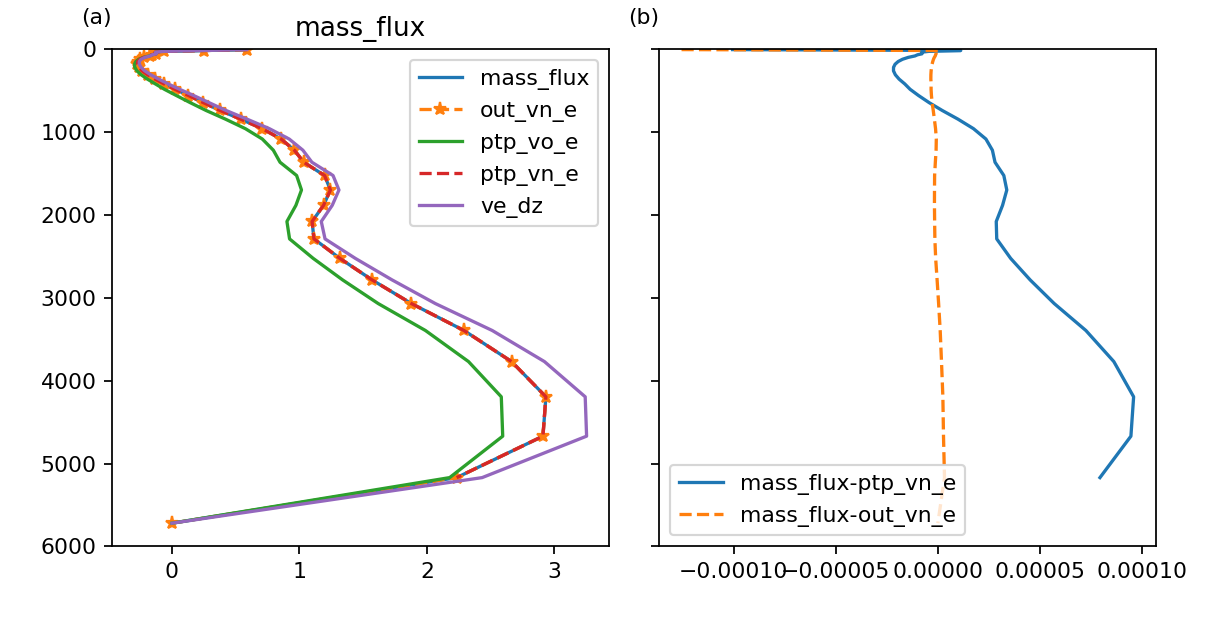

In [23]:
hca, hcb = pyic.arrange_axes(2,1, asp=1., fig_size_fac=2, plot_cb=False,
                             sharex=True, sharey=True)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(mass_flux[:,ie30w26n], IcD.depthc, label='mass_flux')
ax.plot(out_vn_e[:,ie30w26n], IcD.depthc, label='out_vn_e', linestyle='--', marker='*')
ax.plot(ptp_vo_e[:,ie30w26n], IcD.depthc, label='ptp_vo_e')
ax.plot(ptp_vn_e[:,ie30w26n], IcD.depthc, label='ptp_vn_e', linestyle='--')
ax.plot(vn_tw_dz[:,ie30w26n], IcD.depthc, label='ve_dz')
ax.set_title('mass_flux')

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(mass_flux[:,ie30w26n]-ptp_vn_e[:,ie30w26n], IcD.depthc, label='mass_flux-ptp_vn_e')
ax.plot(mass_flux[:,ie30w26n]-out_vn_e[:,ie30w26n], IcD.depthc, label='mass_flux-out_vn_e', linestyle='--')
# ax.plot(mass_flux[:,ie30w26n]-vn_tw_dz[:,ie30w26n], IcD.depthc, label='mass_flux-ve_dz')

for ax in hca:
    ax.legend()
    ax.set_ylim(6000,0)

## Derive vertical velocity from edge mass fluxes

In [24]:
wvel = pyic.calc_wvel(IcD, mass_flux)
wvel_from_uv = pyic.calc_wvel(IcD, ptp_vo_e)
wvel_from_vn = pyic.calc_wvel(IcD, ptp_vn_e)
wvel_from_ou = pyic.calc_wvel(IcD, out_vn_e)

In [25]:
iz = 10
lon, lat, woi = pyic.interp_to_rectgrid(wo[iz,:], fpath_ckdtree=fpath_ckdtree)
lon, lat, wveli = pyic.interp_to_rectgrid(wvel[iz,:], fpath_ckdtree=fpath_ckdtree)
lon, lat, wvel_from_uvi = pyic.interp_to_rectgrid(wvel_from_uv[iz,:], fpath_ckdtree=fpath_ckdtree)
lon, lat, wvel_from_vni = pyic.interp_to_rectgrid(wvel_from_vn[iz,:], fpath_ckdtree=fpath_ckdtree)
lon, lat, wvel_from_oui = pyic.interp_to_rectgrid(wvel_from_ou[iz,:], fpath_ckdtree=fpath_ckdtree)

<IPython.core.display.Javascript object>


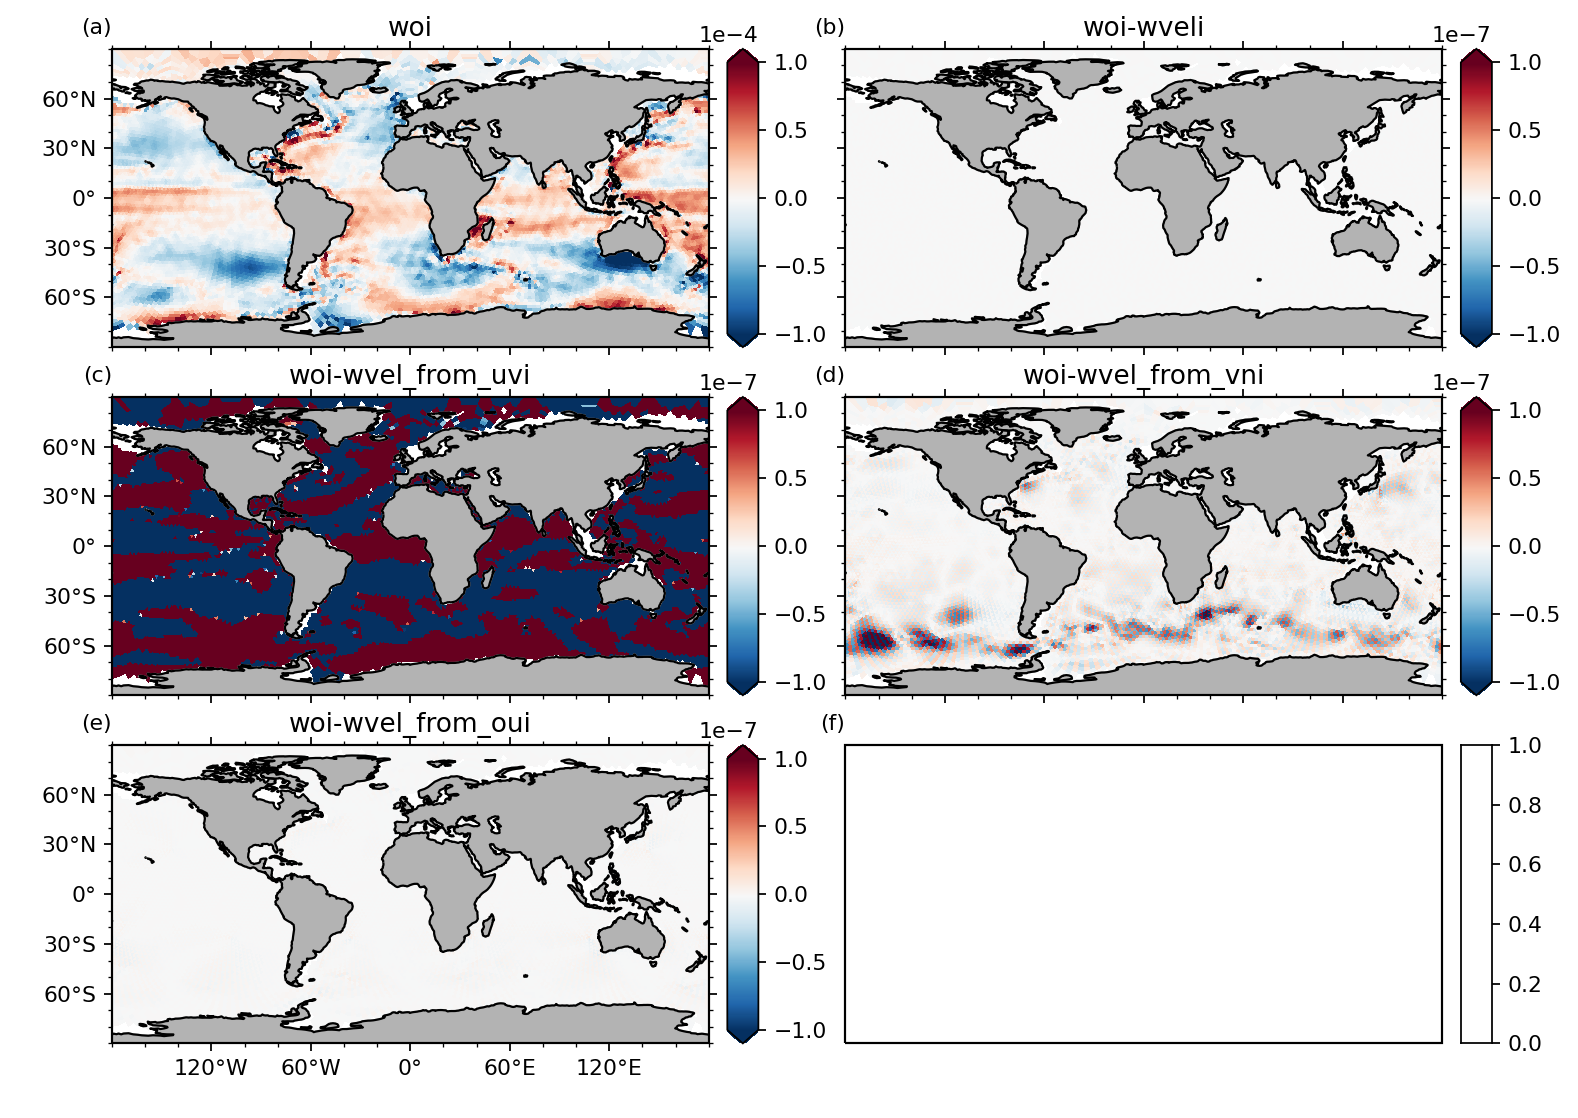

Text(0.5, 1.0, 'woi-wvel_from_oui')

In [26]:
# --- projection
ccrs_proj = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(2,3, asp=0.5, projection=ccrs_proj, fig_size_fac=1.2,
                             sharex=True, sharey=True)
ii=-1

clim = 1e-4
clim_diff = clim/1000.

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, woi, ax=ax, cax=cax, clim=clim, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global')
ax.set_title('woi')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, woi-wveli, ax=ax, cax=cax, clim=clim_diff, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global')
ax.set_title('woi-wveli')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, woi-wvel_from_uvi, ax=ax, cax=cax, clim=clim_diff, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global')
ax.set_title('woi-wvel_from_uvi')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, woi-wvel_from_vni, ax=ax, cax=cax, clim=clim_diff, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global')
ax.set_title('woi-wvel_from_vni')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, woi-wvel_from_oui, ax=ax, cax=cax, clim=clim_diff, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global')
ax.set_title('woi-wvel_from_oui')

In [27]:
# dim(dist_vector) = (nCells, nEdgesOfCell, nCartDims)
dist_vector = IcD.edge_cart_vec[IcD.edge_of_cell,:] - IcD.cell_cart_vec[:,np.newaxis,:]
# dim(edge2cell_coeff_cc) = (nCells, nEdgesOfCell, nCartDims)
edge2cell_coeff_cc = dist_vector * IcD.edge_length[IcD.edge_of_cell,np.newaxis] * IcD.orientation_of_normal[:,:,np.newaxis]
# dim(edge2cell_coeff_cc[np.newaxis,:,:,:]) = (nDepth, nCells, nEdgesOfCell, nCartDims)
# dim(fixed_vol_norm) = (nCells)
fixed_vol_norm = (0.5 * np.sqrt(scalar_product(dist_vector,dist_vector)) * IcD.edge_length[IcD.edge_of_cell]).sum(axis=1)
fixed_vol_norm1 = (0.5 * np.sqrt(scalar_product(dist_vector,dist_vector,dim=2)) * IcD.edge_length[IcD.edge_of_cell]).sum(axis=1)

In [28]:
fixed_vol_norm[ic]/IcD.grid_sphere_radius, fixed_vol_norm1[ic]/IcD.grid_sphere_radius

(0.0006290902963263247, 0.0006330696806943192)

## Tracer fluxes (edges2edges_via_cell_scalar)

In [29]:
sref = 34.8
vt = pyic.edges2edges_via_cell_scalar(IcD, vn, IcD.cp*IcD.rho0*to, dze=dze)
vs = pyic.edges2edges_via_cell_scalar(IcD, vn, (sref-so)/sref, dze=dze)

In [30]:
div_vt = (vt[:,IcD.edge_of_cell]*IcD.div_coeff[np.newaxis,:,:]).sum(axis=2)
div_vs = (vs[:,IcD.edge_of_cell]*IcD.div_coeff[np.newaxis,:,:]).sum(axis=2)

In [31]:
uoto = IcD.cp*IcD.rho0*uo*(to)
voto = IcD.cp*IcD.rho0*vo*(to)
ut_dz = (uoto*dz)
vt_dz = (voto*dz)
p_vt = pyic.calc_3d_from_2dlocal(IcD, ut_dz, vt_dz)
ptp_vt = pyic.cell2edges(IcD, p_vt*IcD.wet_c[:,:,np.newaxis])*IcD.wet_e
div_vt_uv = (ptp_vt[:,IcD.edge_of_cell]*IcD.div_coeff[np.newaxis,:,:]).sum(axis=2)

In [32]:
# ireg = ((IcD.clat>=55) & (IcD.clat<60) & (IcD.clon>=-70) & (IcD.clon<35.))
ireg = ((IcD.clat>=30) & (IcD.clat<35) & (IcD.clon>=-50) & (IcD.clon<-40.))
# ireg = (IcD.clat<40) & (IcD.wet_c[0,:]!=0)
ic_ireg = np.where(ireg)[0]

In [33]:
iedge = IcD.edge_of_cell[ireg,:]
iedge = iedge.reshape(iedge.size)
oedge = IcD.orientation_of_normal[ireg,:]
oedge = oedge.reshape(iedge.size)
iedge_out, ind, cnts = np.unique(iedge, return_index=True, return_counts=True)
iedge_out = iedge_out[(cnts==1)]
oedge_out = oedge[ind]
oedge_out = oedge_out[(cnts==1)]
# orient = IcD.orientation_of_normal[ic_mask_np,:]
# ie_tmp, ind, cnts = np.unique(ie, return_index=True, return_counts=True)
# or_tmp = orient.reshape(ie.size)[ind]

In [34]:
lon, lat, iregi = pyic.interp_to_rectgrid(ireg, fpath_ckdtree=fpath_ckdtree)
lon, lat, wet_ci = pyic.interp_to_rectgrid(IcD.wet_c[0,:], fpath_ckdtree=fpath_ckdtree)

<IPython.core.display.Javascript object>


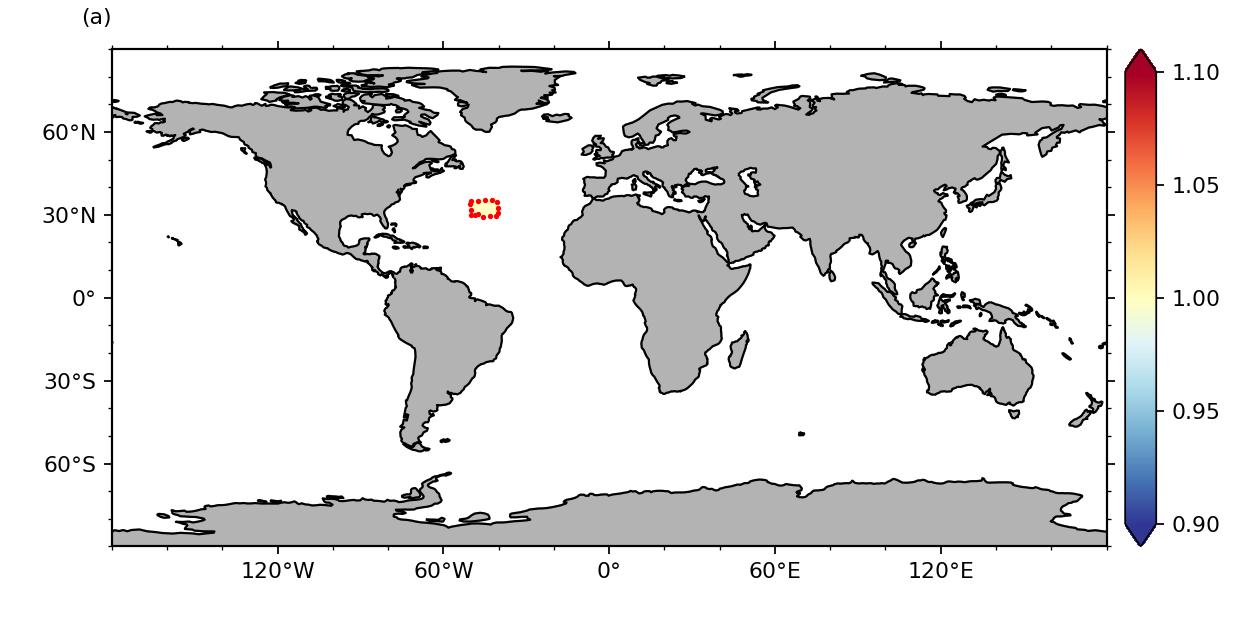

In [35]:
# --- projection
ccrs_proj = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(1,1, asp=0.5, projection=ccrs_proj, fig_size_fac=2,
                             sharex=True, sharey=True)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
# pyic.shade(IcD.Tri, IcD.wet_c[0,:], ax=ax, cax=cax, clim='auto', projection=ccrs.PlateCarree())
pyic.shade(lon, lat, iregi, ax=ax, cax=cax, clim='auto', projection=ccrs.PlateCarree())
#pyic.shade(lon, lat, wet_ci, ax=ax, cax=cax, clim='auto', projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global',)
#ax.set_title('')

ax.scatter(IcD.elon[iedge_out], IcD.elat[iedge_out], s=2, c='r', transform=ccrs.PlateCarree())

In [36]:
div_vt_vsum = div_vt.sum(axis=0)
#div_vs_vsum = div_vs.sum(axis=0)
div_vt_uv_vsum = div_vt_uv.sum(axis=0)
delta_thetao_sum = delta_thetao.sum(axis=0)
print(div_vt[:,ireg].sum())
print(div_vt_uv[:,ireg].sum())
print(HeatFlux_Total[ireg].sum())
print(delta_thetao_sum[ireg].sum())
print('')
print(div_vs[:,ireg].sum())
print(FrshFlux_TotalOcean[ireg].sum())

-52607.00329498435
-51475.4684347834
-10922.06
8497.757

2.6600581480676536e-05
-2.4870642e-06


In [37]:
delta_thetao_sum.shape

(15117,)

In [39]:
lon, lat, HeatFlux_Totali = pyic.interp_to_rectgrid(HeatFlux_Total, fpath_ckdtree=fpath_ckdtree)
lon, lat, div_vt_vsumi = pyic.interp_to_rectgrid(div_vt_vsum, fpath_ckdtree=fpath_ckdtree)
lon, lat, div_vt_uv_vsumi = pyic.interp_to_rectgrid(div_vt_uv_vsum, fpath_ckdtree=fpath_ckdtree)
lon, lat, delta_thetao_sumi = pyic.interp_to_rectgrid(delta_thetao_sum, fpath_ckdtree=fpath_ckdtree)

lon, lat, FrshFlux_TotalOceani = pyic.interp_to_rectgrid(FrshFlux_TotalOcean, fpath_ckdtree=fpath_ckdtree)
# lon, lat, div_vs_vsumi = pyic.interp_to_rectgrid(div_vs_vsum, fpath_ckdtree=fpath_ckdtree)

In [40]:
delta_thetao_sumi.shape

(600, 1200)

In [41]:
class mydata(object):
  def __init_(self):
    return

In [42]:
# --- temperature
vlist = [
  'Tt_had', 'Tt_vad', 'Tt_hdf', 'Tt_vdf', 'Tt_idf', 'Tt_sur', 'Tt_srf', 'Tt_tot', 'opottemptend',
         ]
Mt  = mydata()
for var in vlist:
  data, it_ave = pyic.time_average(IcD, var, t1=t1, t2=t2, iz='all')
  data *= IcD.cp*IcD.rho0
  setattr(Mt, var, data)
Mt.Tt_sur += Mt.Tt_srf
Mt.Tt_res = Mt.Tt_tot - (Mt.Tt_had + Mt.Tt_vad + Mt.Tt_hdf + Mt.Tt_vdf + Mt.Tt_idf + Mt.Tt_sur)

# --- salinity
vlist = [
  'Ts_had', 'Ts_vad', 'Ts_hdf', 'Ts_vdf', 'Ts_idf', 'Ts_sur', 'Ts_srf', 'Ts_tot', 'osalttend',
         ]
Ms  = mydata()
for var in vlist:
  data, it_ave = pyic.time_average(IcD, var, t1=t1, t2=t2, iz='all')
  setattr(Ms, var, data)
Ms.Ts_sur += Ms.Ts_srf
Ms.Ts_res = Ms.Ts_tot - (Ms.Ts_had + Ms.Ts_vad + Ms.Ts_hdf + Ms.Ts_vdf + Ms.Ts_idf + Ms.Ts_sur)

pyicon.time_average: var=Tt_had: it_ave=[6]
pyicon.time_average: var=Tt_vad: it_ave=[6]
pyicon.time_average: var=Tt_hdf: it_ave=[6]
pyicon.time_average: var=Tt_vdf: it_ave=[6]
pyicon.time_average: var=Tt_idf: it_ave=[6]
pyicon.time_average: var=Tt_sur: it_ave=[6]
pyicon.time_average: var=Tt_srf: it_ave=[6]
pyicon.time_average: var=Tt_tot: it_ave=[6]
pyicon.time_average: var=opottemptend: it_ave=[6]
pyicon.time_average: var=Ts_had: it_ave=[6]
pyicon.time_average: var=Ts_vad: it_ave=[6]
pyicon.time_average: var=Ts_hdf: it_ave=[6]
pyicon.time_average: var=Ts_vdf: it_ave=[6]
pyicon.time_average: var=Ts_idf: it_ave=[6]
pyicon.time_average: var=Ts_sur: it_ave=[6]
pyicon.time_average: var=Ts_srf: it_ave=[6]
pyicon.time_average: var=Ts_tot: it_ave=[6]
pyicon.time_average: var=osalttend: it_ave=[6]


In [43]:
Mt_plot = mydata()
vlist = ['Tt_had', 'Tt_vad', 'Tt_hdf', 'Tt_vdf', 'Tt_idf', 'Tt_sur', 'Tt_tot', 'Tt_res']
for var in vlist:
  data = getattr(Mt, var)
  #data = (data*dz).sum(axis=0)
  data = (data).sum(axis=0)
  lon, lat, datai = pyic.interp_to_rectgrid(data, fpath_ckdtree=fpath_ckdtree)
  setattr(Mt_plot, var, datai)

<IPython.core.display.Javascript object>


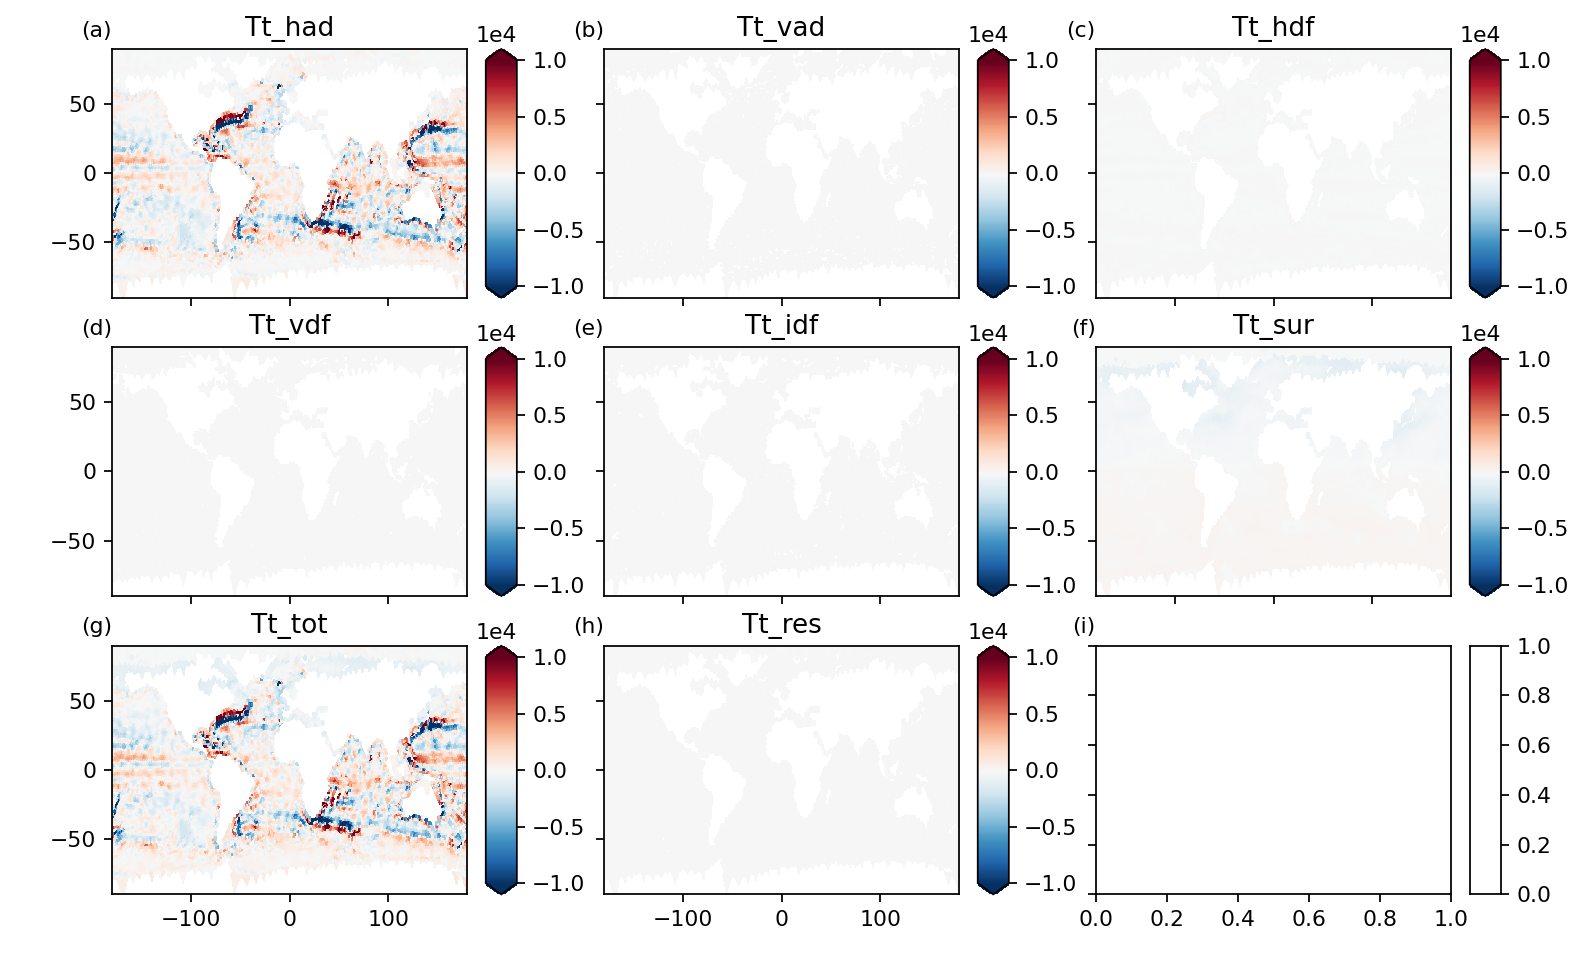

In [44]:
# --- temperature vert. int.
hca, hcb = pyic.arrange_axes(3,3, plot_cb=True, asp=0.7, fig_size_fac=1.,
                            sharex=True, sharey=True, xlabel="", ylabel="",
                            )
ii=-1

#clim = 'sym'
clim = 1e4
vlist = ['Tt_had', 'Tt_vad', 'Tt_hdf', 'Tt_vdf', 'Tt_idf', 'Tt_sur', 'Tt_tot', 'Tt_res']
for var in vlist:
  ii+=1; ax=hca[ii]; cax=hcb[ii]
  datai = getattr(Mt_plot, var)
  hm = pyic.shade(lon, lat, datai, ax=ax, cax=cax, clim=clim)
  ax.set_title(var)

<IPython.core.display.Javascript object>


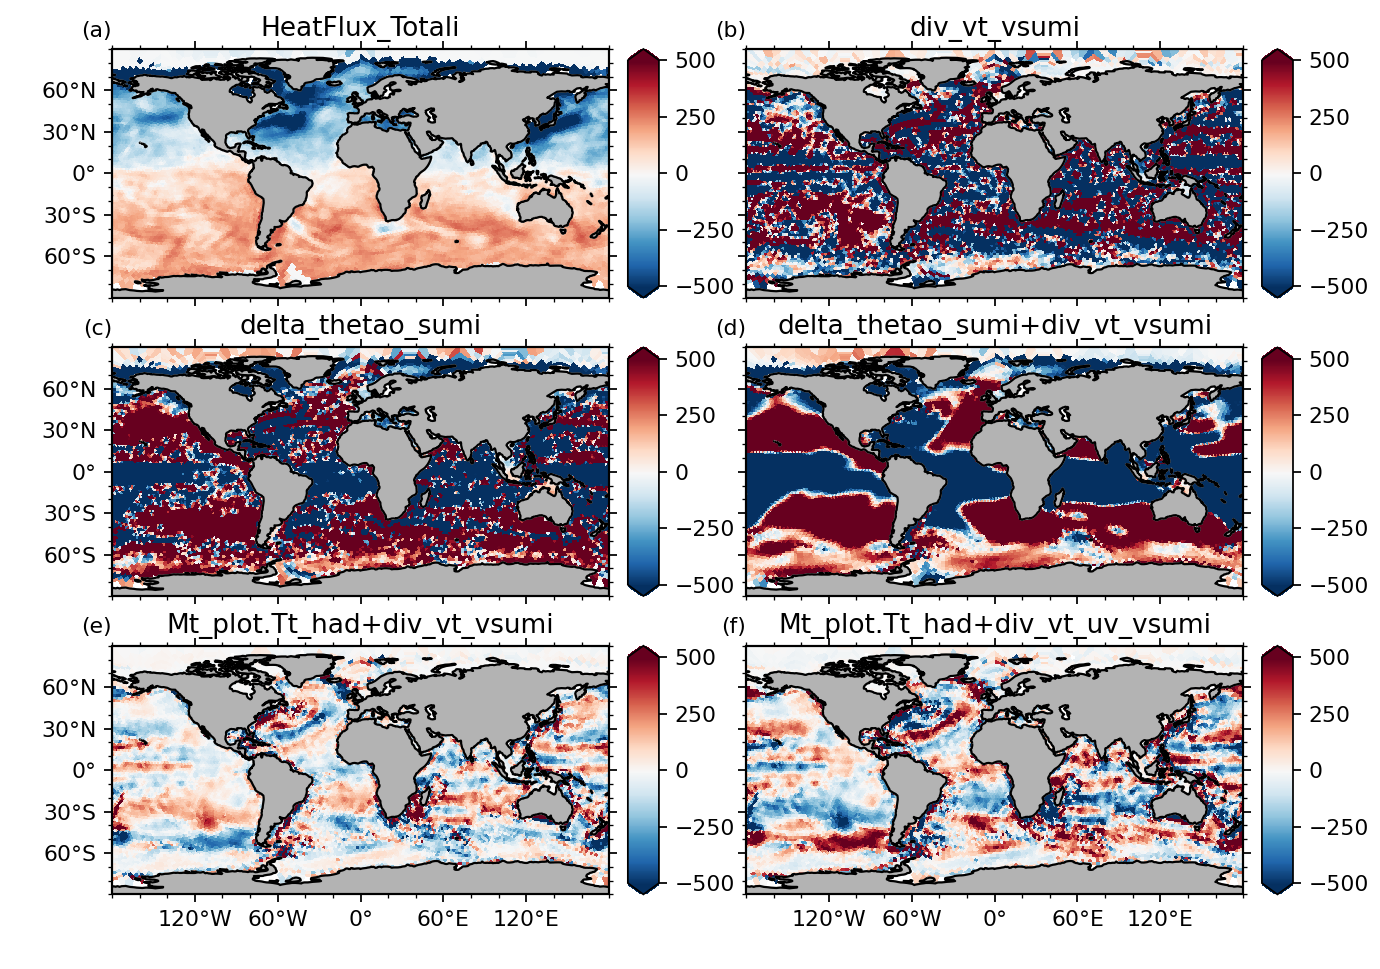

Text(0.5, 1.0, 'Mt_plot.Tt_had+div_vt_uv_vsumi')

In [45]:
# --- projection
ccrs_proj = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(2,3, asp=0.5, projection=ccrs_proj, fig_size_fac=1,
                             sharex=True, sharey=True)
ii=-1

clim = 0.5e3
# clim = 'sym'

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, HeatFlux_Totali, ax=ax, cax=cax, clim=clim, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global',)
ax.set_title('HeatFlux_Totali')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, div_vt_vsumi, ax=ax, cax=cax, clim=clim, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global',)
ax.set_title('div_vt_vsumi')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, delta_thetao_sumi, ax=ax, cax=cax, clim=clim, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global',)
ax.set_title('delta_thetao_sumi')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, delta_thetao_sumi+div_vt_vsumi, ax=ax, cax=cax, clim=clim, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global',)
ax.set_title('delta_thetao_sumi+div_vt_vsumi')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, Mt_plot.Tt_had+div_vt_vsumi, ax=ax, cax=cax, clim=clim, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global',)
ax.set_title('Mt_plot.Tt_had+div_vt_vsumi')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, Mt_plot.Tt_had+div_vt_uv_vsumi, ax=ax, cax=cax, clim=clim, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global',)
ax.set_title('Mt_plot.Tt_had+div_vt_uv_vsumi')

# ii+=1; ax=hca[ii]; cax=hcb[ii]
# pyic.shade(lon, lat, FrshFlux_TotalOceani, ax=ax, cax=cax, clim=clim, projection=ccrs.PlateCarree())
# pyic.plot_settings(ax=ax, template='global',)
# ax.set_title('FrshFlux_TotalOceani')

# ii+=1; ax=hca[ii]; cax=hcb[ii]
# pyic.shade(lon, lat, div_vs_vsumi, ax=ax, cax=cax, clim=clim, projection=ccrs.PlateCarree())
# pyic.plot_settings(ax=ax, template='global',)
# ax.set_title('div_vs_vsumi')


### Test with global zonally averaged heat flux

In [46]:
ny = 180
lat_ht = np.linspace(-90.,90.,ny)
T_heat = np.ma.zeros((ny))
T_heat_uv = np.ma.zeros((ny))
T_frwa = np.ma.zeros((ny))
T_heat_surf = np.ma.zeros((ny))
T_frwa_surf = np.ma.zeros((ny))
Mt_hf = mydata()
vlist = ['Tt_had', 'Tt_vad', 'Tt_hdf', 'Tt_vdf', 'Tt_idf', 'Tt_sur', 'Tt_tot', 'Tt_res']
Dhf = dict()
for var in vlist:
    #setattr(Mt_hf, var, np.ma.zeros((ny)))
    Dhf[var] = np.ma.zeros((ny))
for j in range(ny):
#     if j%5==0:
#         print(f'j = {j}/{ny}')
    ireg = (IcD.clat<lat_ht[j])# & (IcD.clat>=lat_ht[j]-0.5)
    ic_ireg = np.where(ireg)[0]
    iedge = IcD.edge_of_cell[ireg,:]
    iedge = iedge.reshape(iedge.size)
    oedge = IcD.orientation_of_normal[ireg,:]
    oedge = oedge.reshape(iedge.size)
    iedge_out, ind, cnts = np.unique(iedge, return_index=True, return_counts=True)
    iedge_out = iedge_out[cnts==1]
    oedge_out = oedge[ind]
    oedge_out = oedge_out[cnts==1]
#     T_heat[j] = (ptp_vt_e[0,iedge_out]*IcD.edge_length[iedge_out]*oedge_out).sum()/1e15
    T_heat[j] = (vt[:,iedge_out]*IcD.edge_length[np.newaxis,iedge_out]*oedge_out[np.newaxis,:]).sum()/1e15
    T_heat_uv[j] = (ptp_vt[:,iedge_out]*IcD.edge_length[np.newaxis,iedge_out]*oedge_out[np.newaxis,:]).sum()/1e15
    T_frwa[j] = (vs[:,iedge_out]*IcD.edge_length[np.newaxis,iedge_out]*oedge_out[np.newaxis,:]).sum()/1e6
    T_heat_surf[j] = (HeatFlux_Total[ireg]*IcD.cell_area[ireg]*IcD.wet_c[0,ireg]).sum()/1e15
    T_frwa_surf[j] = (FrshFlux_TotalOcean[ireg]*IcD.cell_area[ireg]*IcD.wet_c[0,ireg]).sum()/1e6
    for var in vlist:
        data = getattr(Mt, var)
        Dhf[var][j] = (data[:,ireg]*IcD.cell_area[ireg]*IcD.wet_c[:,ireg]).sum()/1e15
    
#     if j==60:
    if False:
        lon, lat, iregi = pyic.interp_to_rectgrid(ireg, fpath_ckdtree=fpath_ckdtree)

        # --- projection
        ccrs_proj = ccrs.PlateCarree()
        hca, hcb = pyic.arrange_axes(1,1, asp=0.5, projection=ccrs_proj, fig_size_fac=2,
                                     sharex=True, sharey=True)
        ii=-1

        ii+=1; ax=hca[ii]; cax=hcb[ii]
        pyic.shade(lon, lat, iregi, ax=ax, cax=cax, clim='auto', projection=ccrs.PlateCarree())
        pyic.plot_settings(ax=ax, template='global',)
        
T_heat[np.isnan(T_heat)] = np.ma.masked
T_frwa[np.isnan(T_frwa)] = np.ma.masked
# T_heat_surf[1:] = T_heat_surf[1:]-T_heat_surf[:-1]
# T_frwa_surf[1:] = T_frwa_surf[1:]-T_frwa_surf[:-1]

In [47]:
global_hfl, it_ave   = pyic.time_average(IcD_moc, 'global_hfl', t1=t1, t2=t2, iz='all')
global_wfl, it_ave   = pyic.time_average(IcD_moc, 'global_wfl', t1=t1, t2=t2, iz='all')
global_hfbasin, it_ave   = pyic.time_average(IcD_moc, 'global_hfbasin', t1=t1, t2=t2, iz='all')

pyicon.time_average: var=global_hfl: it_ave=[6]
pyicon.time_average: var=global_wfl: it_ave=[6]
pyicon.time_average: var=global_hfbasin: it_ave=[6]


In [48]:
f = Dataset(IcD_moc.flist_ts[0], 'r')
lat_moc = f.variables['lat'][:]
f.close()

<IPython.core.display.Javascript object>


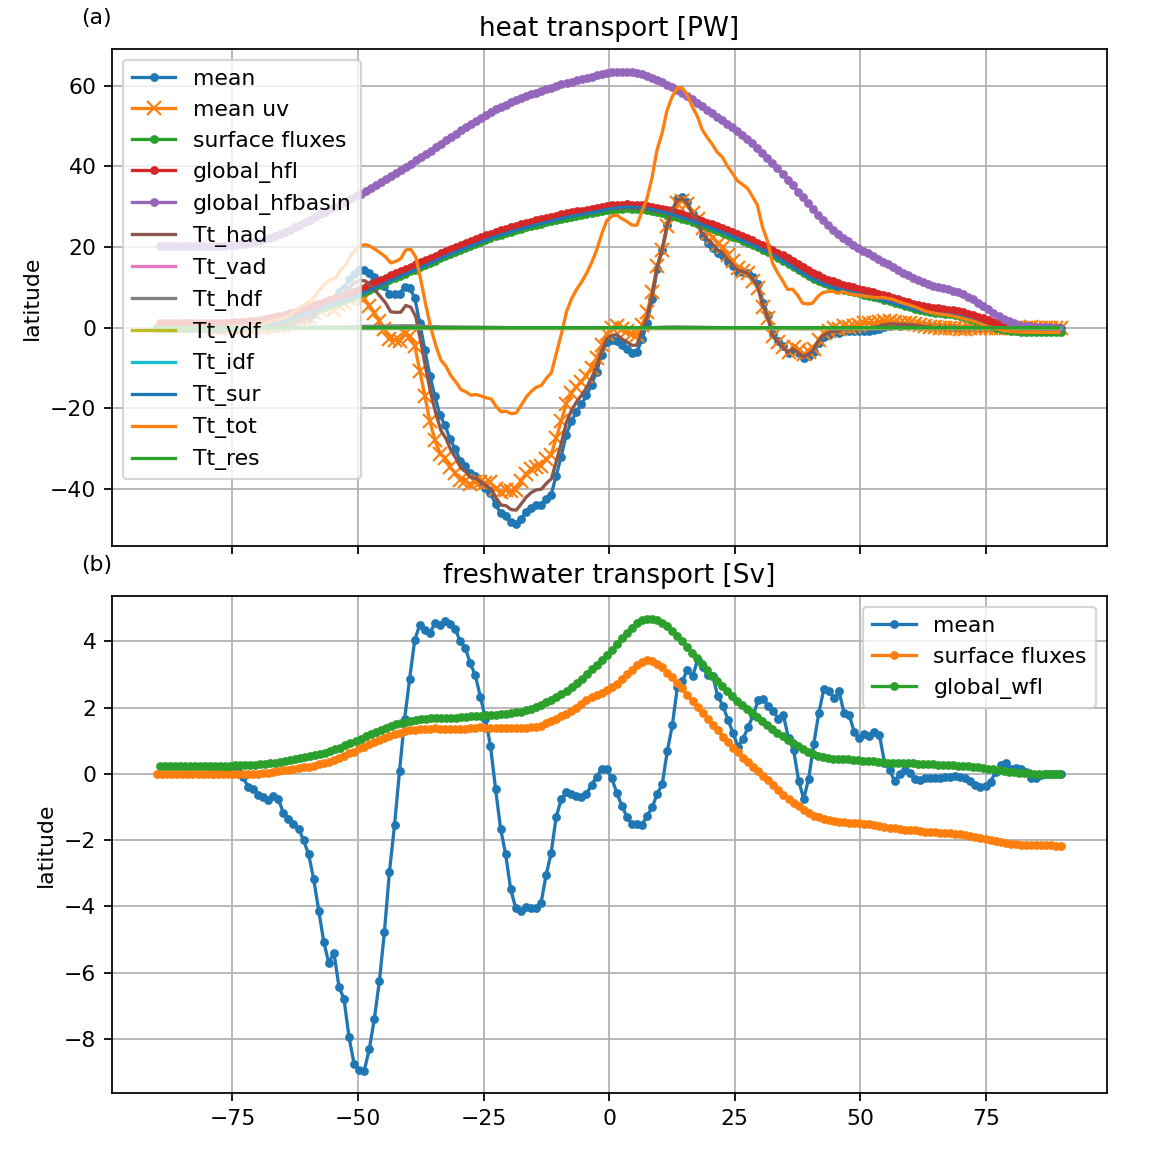

In [49]:
hca, hcb = pyic.arrange_axes(1,2, asp=0.5, fig_size_fac=2, plot_cb=False,
                             sharex=True, sharey=True)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(lat_ht, -T_heat, marker='.', label='mean')
ax.plot(lat_ht, -T_heat_uv, marker='x', label='mean uv')
ax.plot(lat_ht, T_heat_surf, marker='.', label='surface fluxes')
ax.plot(lat_moc, global_hfl/1e15, marker='.', label='global_hfl')
ax.plot(lat_moc, global_hfbasin/1e15, marker='.', label='global_hfbasin')
for var in vlist:
    ax.plot(lat_moc, Dhf[var], label=var)
ax.set_ylabel('latitude')
ax.set_title('heat transport [PW]')
ax.grid(True)
ax.legend()

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(lat_ht, T_frwa, marker='.', label='mean')
ax.plot(lat_ht, T_frwa_surf, marker='.', label='surface fluxes')
ax.plot(lat_moc, global_wfl/1e6, marker='.', label='global_wfl')
# ax.plot(lat_moc, global_sltbasin/1e6, marker='.', label='global_sltbasin')
ax.set_ylabel('latitude')
ax.set_title('freshwater transport [Sv]')
ax.grid(True)
ax.legend()